<a href="https://colab.research.google.com/github/fatalistix/smgmo/blob/main/lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Задание 1***

In [ ]:
import math
import numpy as np
import math
import scipy
import sklearn.datasets
import sklearn.metrics
import matplotlib.pyplot as plt
import matplotlib.colors as colors

N - количество элементов выборки для каждого из $y\in\{0,1\}$

In [ ]:
rng = np.random.default_rng()
N = 1000

Функция фильтрации на нули и единицы

In [ ]:
def sort_dataset(dset):
  __x_d = [dset[0][i][0] for i in range(len(dset[0]))]
  __y_d = [dset[0][i][1] for i in range(len(dset[0]))]
  __l_d = dset[1]

  d_0_x = []
  d_0_y = []
  d_1_x = []
  d_1_y = []

  for i in range(len(__x_d)):
    if __l_d[i] == 0:
      d_0_x.append(__x_d[i])
      d_0_y.append(__y_d[i])
    else:
      d_1_x.append(__x_d[i])
      d_1_y.append(__y_d[i])

  return d_0_x, d_0_y, d_1_x, d_1_y

Генератор данных в виде круга и окружности

In [ ]:
def generate_circle_dataset(
  num_points,
  internal_circle_radius,
  outer_low_radius,
  outer_high_radius,
  center,
  eps):
  x_dataset = []
  l_dataset = []
  shift = outer_low_radius - internal_circle_radius
  global_radius = outer_high_radius - shift
  for i in range(num_points):
    r = rng.uniform(0, global_radius)
    a = rng.uniform(0, 2 * math.pi)
    label = 1 if r > internal_circle_radius else 0

    r_with_err = r + rng.uniform(-eps, eps)
    a_with_err = a + rng.uniform(-eps, eps)

    r_final = r_with_err + shift if r_with_err > internal_circle_radius else r_with_err
    a_final = a_with_err

    x_final = r_final * math.cos(a_final) + center[0]
    y_final = r_final * math.sin(a_final) + center[1]

    x_dataset.append((x_final, y_final))
    l_dataset.append(label)
  return [x_dataset, l_dataset]

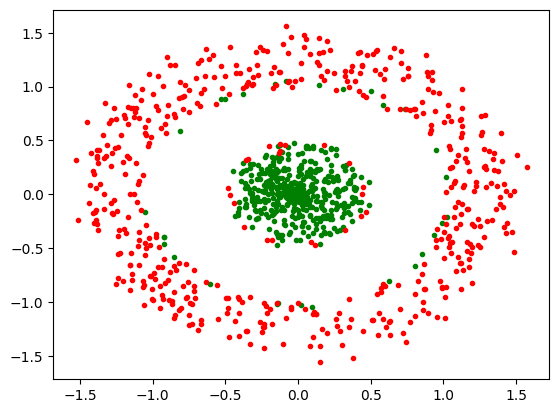

In [ ]:
dataset = generate_circle_dataset(N, 0.5, 1, 1.5, [0, 0], 0.1)
x_0, y_0, x_1, y_1 = sort_dataset(dataset)

plt.plot(x_0, y_0, "g.")
plt.plot(x_1, y_1, "r.")

генепация выборки в формате "исключающее или"

In [ ]:
def generate_xor_dataset(num_points, radius, center, eps):
  x_dataset = []
  l_dataset = []
  for _ in range(num_points):
    x = rng.uniform(-radius, radius)
    y = rng.uniform(-radius, radius)
    label = 1 if (x >= 0 and y < 0) or (x < 0 and y >= 0) else 0
    x_with_err = x + rng.uniform(-eps, eps)
    y_with_err = y + rng.uniform(-eps, eps)
    x_final = x_with_err + center[0]
    y_final = y_with_err + center[1]
    x_dataset.append((x_final, y_final))
    l_dataset.append(label)
  return [x_dataset, l_dataset]

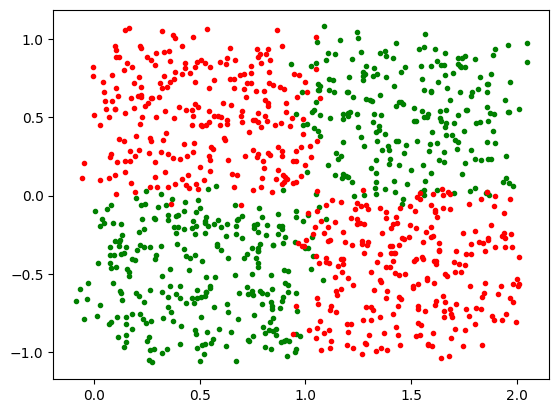

In [ ]:
dataset = generate_xor_dataset(N, 1, [1, 0], 0.1)
x_0, y_0, x_1, y_1 = sort_dataset(dataset)

plt.plot(x_0, y_0, "g.")
plt.plot(x_1, y_1, "r.")

Генерация выборки по гауссу

In [ ]:
def generate_gaussian_dataset(num_points, shift, scale, center, eps):
    x_dataset = []
    l_dataset = []
    for _ in range(num_points // 2):
        x = rng.normal(shift[0], scale[0])
        y = rng.normal(shift[1], scale[1])
        label = 1
        x_with_err = x + rng.uniform(-eps, eps)
        y_with_err = y + rng.uniform(-eps, eps)
        x_final = x_with_err + center[0]
        y_final = y_with_err + center[1]
        x_dataset.append((x, y))
        l_dataset.append(label)

        x = rng.normal(-shift[0], scale[0])
        y = rng.normal(-shift[1], scale[1])
        x_with_err = x + rng.uniform(-eps, eps)
        y_with_err = y + rng.uniform(-eps, eps)
        x_final = x_with_err + center[0]
        y_final = y_with_err + center[1]
        label = 0
        x_dataset.append((x, y))
        l_dataset.append(label)
    return [x_dataset, l_dataset]

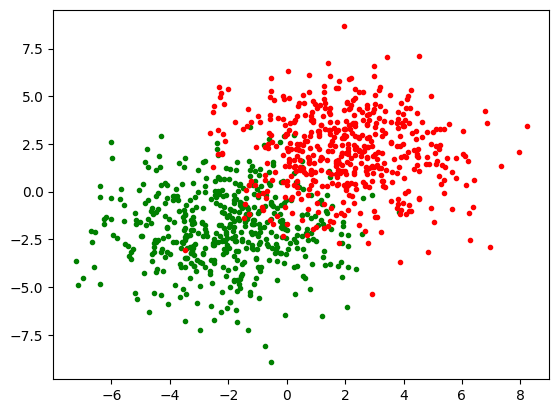

In [ ]:
dataset = generate_gaussian_dataset(N, [2, 2], [2, 2], [0, 0], 0.1)
x_0, y_0, x_1, y_1 = sort_dataset(dataset)

plt.plot(x_0, y_0, "g.")
plt.plot(x_1, y_1, "r.")

генерация выборки в виде спирали

In [ ]:
def generate_spiral_dataset(num_points, eps):
  n = num_points // 2
  x_dataset = []
  l_dataset = []
  for i in range(n):
    r = i / n * 5
    t = 1.75 * i / n * 2 * math.pi
    x = r * math.sin(t) + rng.uniform(-eps, eps)
    y = r * math.cos(t) + rng.uniform(-eps, eps)
    x_dataset.append((x, y))
    l_dataset.append(1)

  for i in range(n):
    r = i / n * 5
    t = 1.75 * i / n * 2 * math.pi + math.pi
    x = r * math.sin(t) + rng.uniform(-eps, eps)
    y = r * math.cos(t) + rng.uniform(-eps, eps)
    x_dataset.append((x, y))
    l_dataset.append(0)

  return [x_dataset, l_dataset]

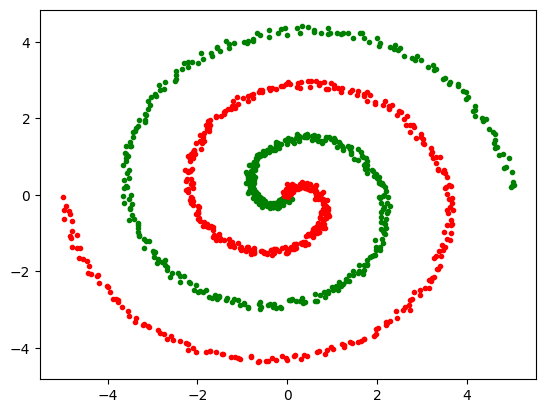

In [ ]:
dataset = generate_spiral_dataset(N, 0.1)
x_0, y_0, x_1, y_1 = sort_dataset(dataset)

plt.plot(x_0, y_0, "g.")
plt.plot(x_1, y_1, "r.")

***Переобучение на примерах разных выборок и разных моделей сетей***

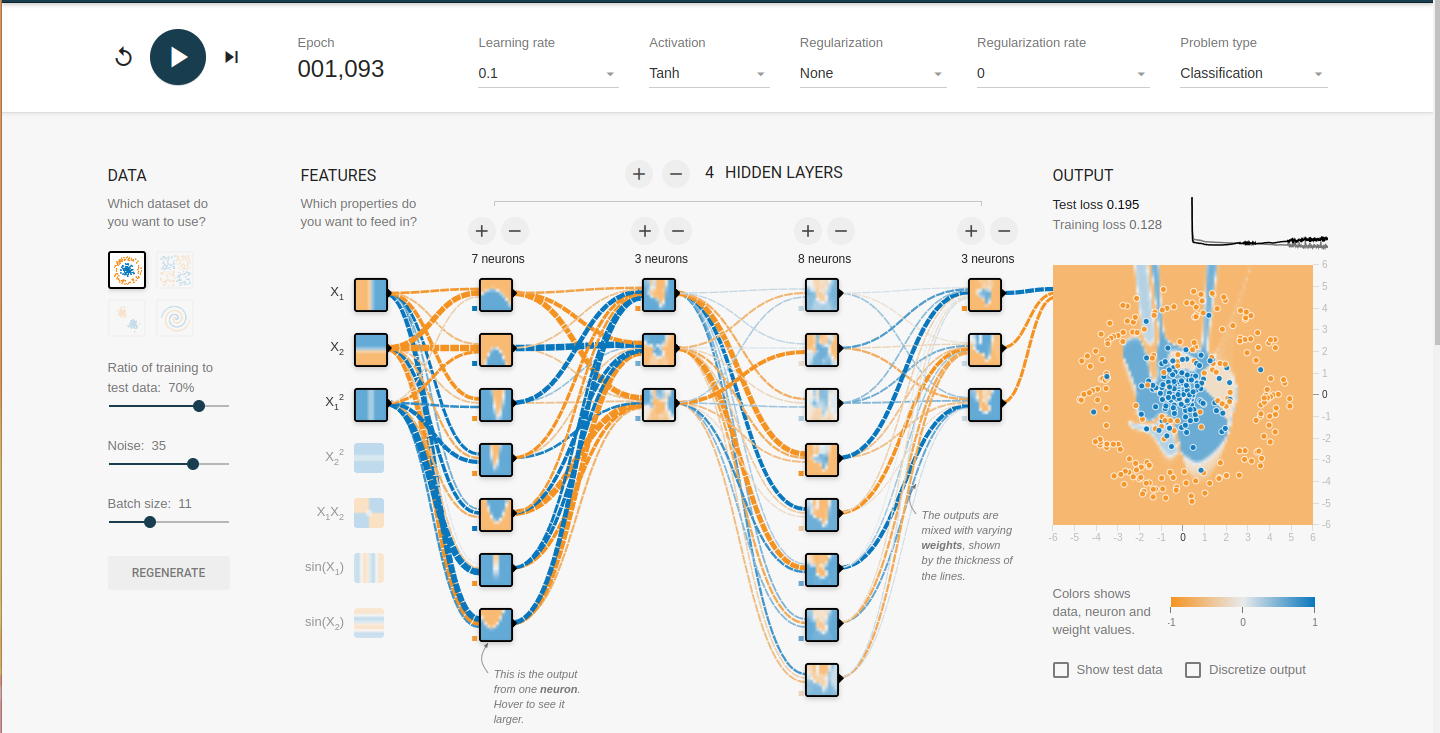

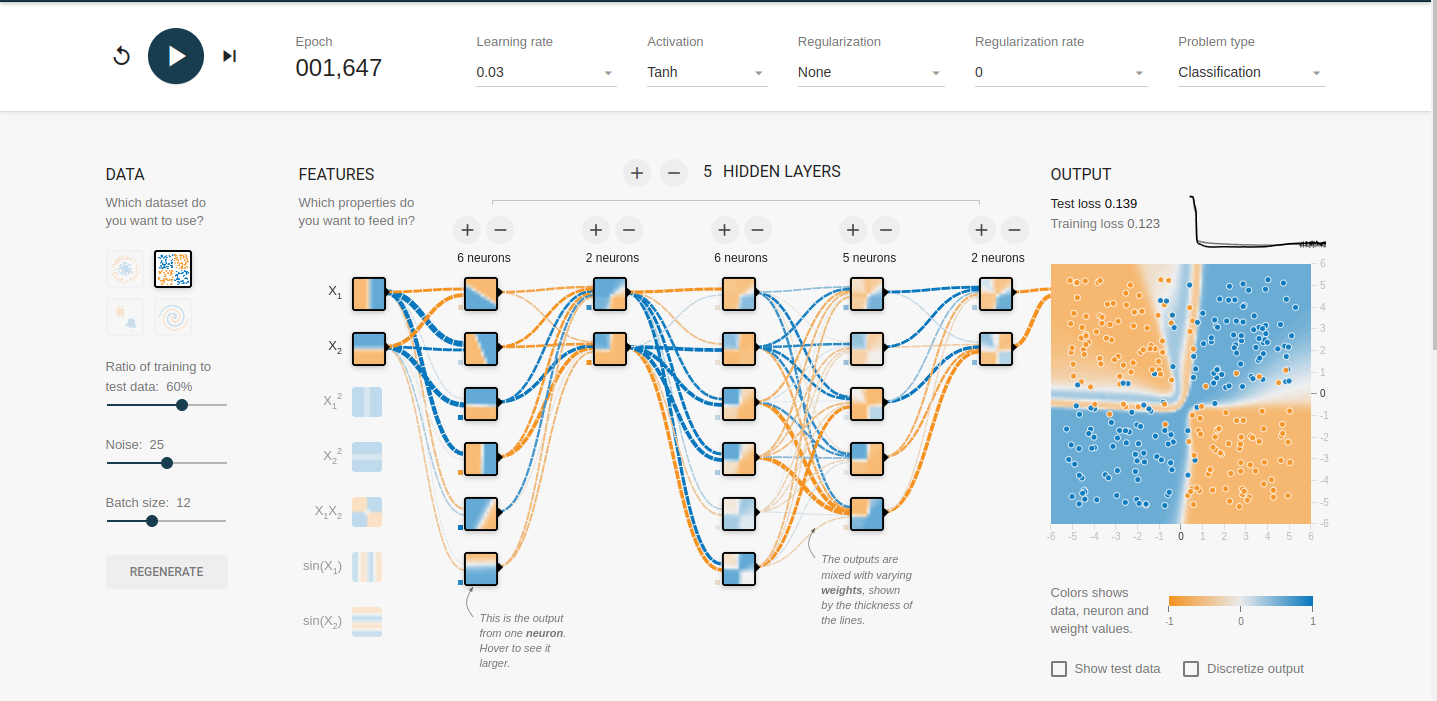

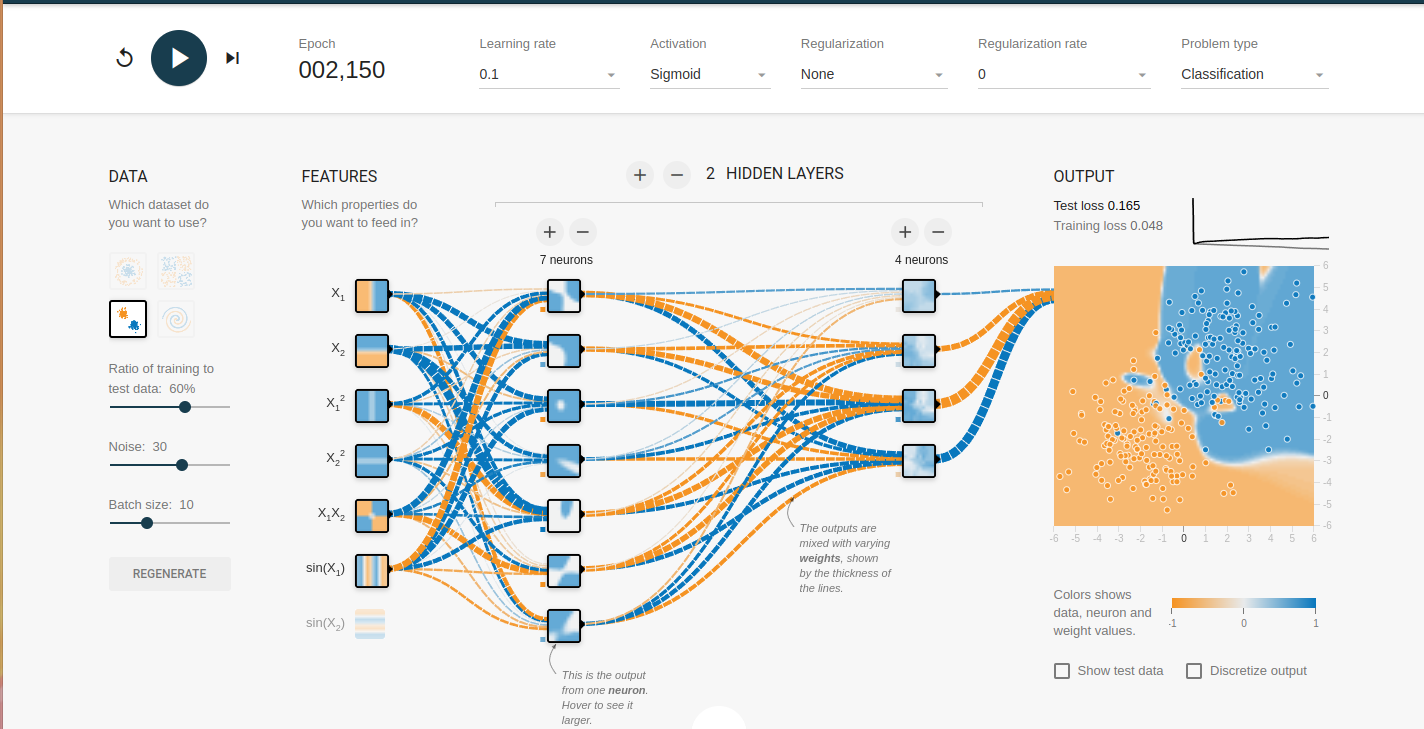

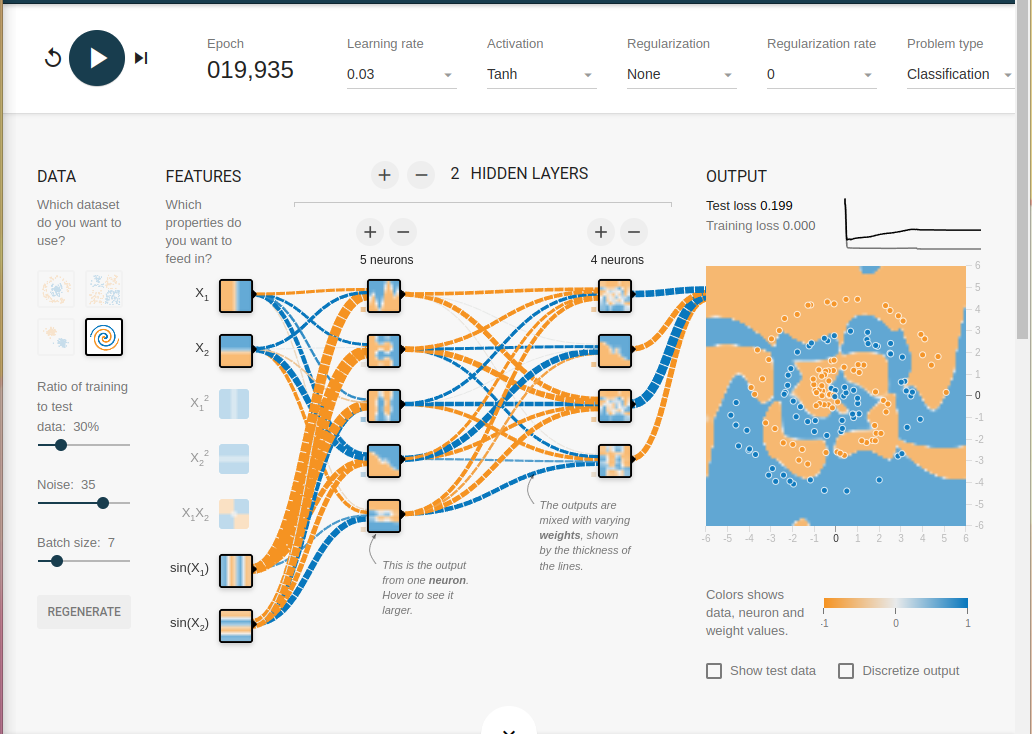

***Задание 2***

In [ ]:
def f_a_step(x_arg):
  return 1 if x_arg >= 0 else -1

In [ ]:
def f_a_sigmoid(x_arg):
  return 1 / (1 + math.exp(-x_arg))

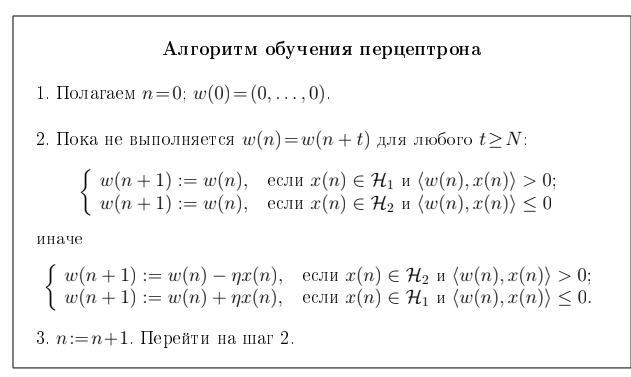

In [ ]:
class SimplePerceptron:

  def __init__(self, learning_rate, epoch, activation_f):
    self.weights = None
    self.bias = None
    self.epoch = epoch
    self.learning_rate = learning_rate
    self.activation_f = activation_f

  def fit(self, x_features, y_target):
    n_examples, n_features = x_features.shape

    self.weights = np.zeros(n_features)
    self.bias = 0

    for example_index in range(self.epoch):
      example_features = x_features[example_index % n_examples]
      net_input = np.dot(example_features, self.weights) + self.bias
      y_predicted = self.activation_f(net_input)
      self._update_weights(example_features, y_target[example_index % n_examples], y_predicted)

  def _update_weights(self, example_features, y_actual, y_predicted):
    if y_actual == 1:
      if y_predicted > 0:
        self.weights = self.weights
        self.bias = self.bias
      else:
        self.weights = self.weights + self.learning_rate * example_features
        self.bias = self.bias + self.learning_rate
    else:
      if y_predicted > 0:
        self.weights = self.weights - self.learning_rate * example_features
        self.bias = self.bias - self.learning_rate
      else:
        self.weights = self.weights
        self.bias = self.bias

  def predict(self, features):
    net_input = np.dot(features, self.weights) + self.bias
    y_predicted = self.activation_f(net_input)
    return y_predicted

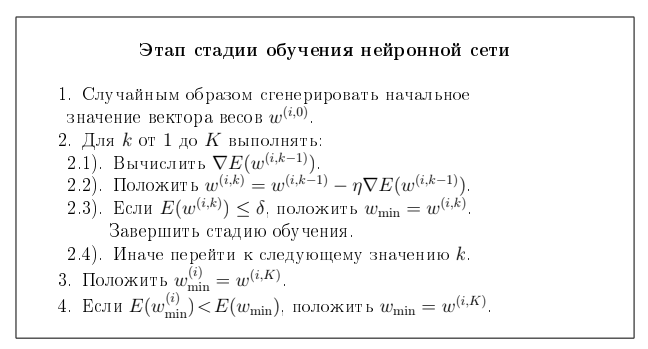

In [ ]:
class AdvancedPerceptron:

  def __init__(self, learning_rate, delta, epoch, stage, activation_f):
    self.weights = None
    self.bias = None
    self.epoch = epoch
    self.stage = stage
    self.learning_rate = learning_rate
    self.activation_f = activation_f
    self.delta = delta
    self.min_weights = None
    self.min_bias = None
    self.min_err = None

  def fit(self, x_features, y_target):
    n_examples, n_features = x_features.shape
    self.min_err = 10000

    for i in range(self.stage):
      i_weights = rng.uniform(-10, 10, n_features)
      i_bias = rng.uniform(-10, 10)

      i_min_weights = i_weights
      i_min_bias = i_bias

      err = 10000

      for k in range(self.epoch):
        gradient_err = self._gradient_err(i_weights, i_bias, self.delta, x_features, y_target)
        new_i_weights = i_weights - self.learning_rate * gradient_err[::len(gradient_err)]
        new_i_bias = i_bias - self.learning_rate * gradient_err[-1]

        new_y_predicted = self._predict(x_features, new_i_weights, new_i_bias, self.activation_f)

        new_err = self._count_err(y_target, new_y_predicted)

        if abs(new_err) < self.delta:
          self.min_weights = new_i_weights
          self.min_bias = new_i_bias

        i_weiths = new_i_weights
        i_bias = new_i_bias
        err = new_err

      i_min_weights = i_weights
      i_min_bias = i_bias

      if err < self.min_err:
        self.weights = i_min_weights
        self.bias = i_min_bias
        self.min_err = err

  def _predict(self, features, weights, bias, activation_function):
    net_input = np.array([np.dot(x, weights) + bias for x in features])
    return [activation_function(__x) for __x in net_input]

  def _count_err(self, y_actual, y_predicted):
    return np.sum(1 / 2 * (np.linalg.norm(y_predicted - y_actual) ** 2))

  def _gradient_err(self, weights, bias, delta, features, target):
    y = self._predict(features, weights, bias, self.activation_f)
    err = self._count_err(y, target)

    gradient = []

    for i in range(len(weights)):
      i_weights = [weights[j] + delta if j == i else weights[j] for j in range(len(weights))]
      y_with_delta = self._predict(features, i_weights, bias, self.activation_f)
      err_with_delta = self._count_err(y_with_delta, target)
      gradient.append((err_with_delta - err) / (delta))

    i_bias = bias + delta
    y_with_delta = self._predict(features, weights, i_bias, self.activation_f)
    err_with_delta = self._count_err(y_with_delta, target)
    gradient.append((err_with_delta - err) / (delta * bias))

    return np.array(gradient)

  def predict(self, features):
    net_input = np.dot(features, self.weights) + self.bias
    y_predicted = self.activation_f(net_input)
    return y_predicted

In [ ]:
dataset = generate_gaussian_dataset(1000, [2, 2], [2, 2], [0, 0], 0.1)
# dataset = generate_circle_dataset(N, 0.5, 1, 1.5, [0, 0], 0.1)
# dataset = generate_spiral_dataset(N, 0.1)
# dataset = generate_xor_dataset(N, 1, [1, 0], 0.1)

In [ ]:
p = SimplePerceptron(0.03, 100, f_a_step)
x_features = np.array([[d[0], d[1]] for d in dataset[0]])
y_features = np.array([1 if d == 1 else -1 for d in dataset[1]])
p.fit(x_features, y_features)
p.predict([-10, -10])

-1

(-10.0, 10.0)

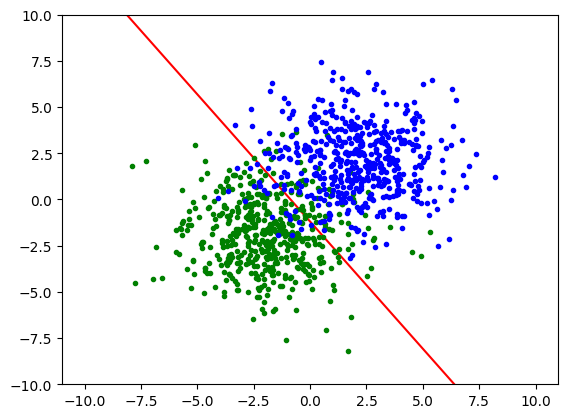

In [ ]:
def f_p(__x):
  return -(p.weights[0] * __x + p.bias) / p.weights[1]

x_0, y_0, x_1, y_1 = sort_dataset(dataset)

x_plot_p = np.linspace(-10, 10, 100)
plt.plot(x_plot_p, f_p(x_plot_p), 'r')
plt.plot(x_0, y_0, 'g.')
plt.plot(x_1, y_1, 'b.')
plt.ylim([-10, 10])

In [ ]:
ap = AdvancedPerceptron(0.03, 0.01, 100, 30, f_a_sigmoid)
y_features = np.array([1 if d == 1 else 0 for d in dataset[1]])
ap.fit(x_features, y_features)
ap.predict([6, 5])

1.0

(-10.0, 10.0)

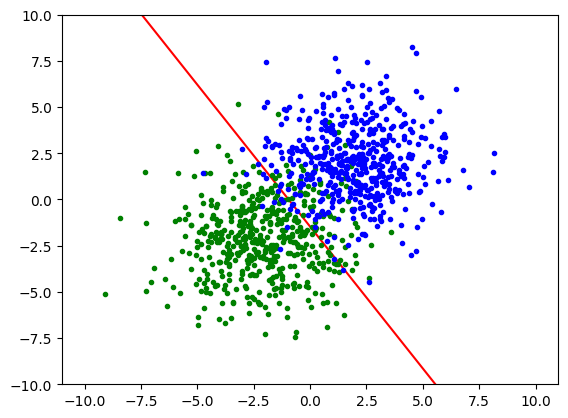

In [ ]:
def f_ap(__x):
  return -(ap.weights[0] * __x + ap.bias) / ap.weights[1]

x_0, y_0, x_1, y_1 = sort_dataset(dataset)

x_plot_p = np.linspace(-10, 10, 100)
plt.plot(x_plot_p, f_ap(x_plot_p), 'r')
plt.plot(x_0, y_0, 'g.')
plt.plot(x_1, y_1, 'b.')
plt.ylim([-10, 10])
# plt.countourf

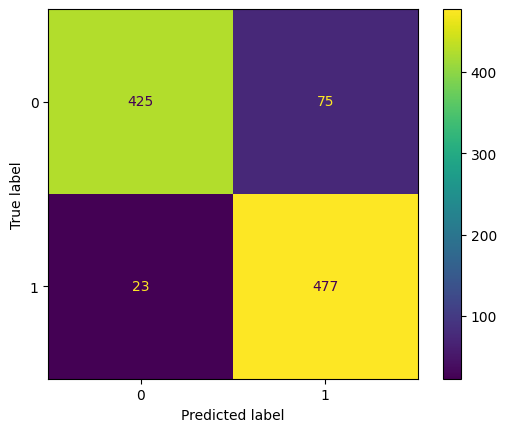

In [ ]:
y__p_predicted = [p.predict(x__) for x__ in dataset[0]]
y__true = [1 if x__ == 1 else -1 for x__ in dataset[1]]
p_cm = sklearn.metrics.confusion_matrix(y__true, y__p_predicted)
sklearn.metrics.ConfusionMatrixDisplay(p_cm).plot()

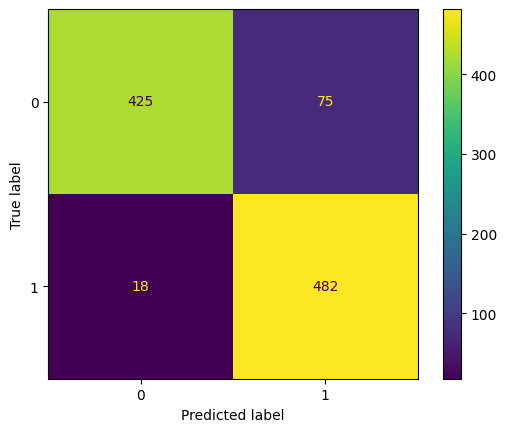

In [ ]:
y__ap_predicted = [1 if ap.predict(x__) > 0.5 else 0 for x__ in dataset[0]]
y__true = [1 if x__ == 1 else 0 for x__ in dataset[1]]
ap_cm = sklearn.metrics.confusion_matrix(y__true, y__ap_predicted)
sklearn.metrics.ConfusionMatrixDisplay(ap_cm).plot()

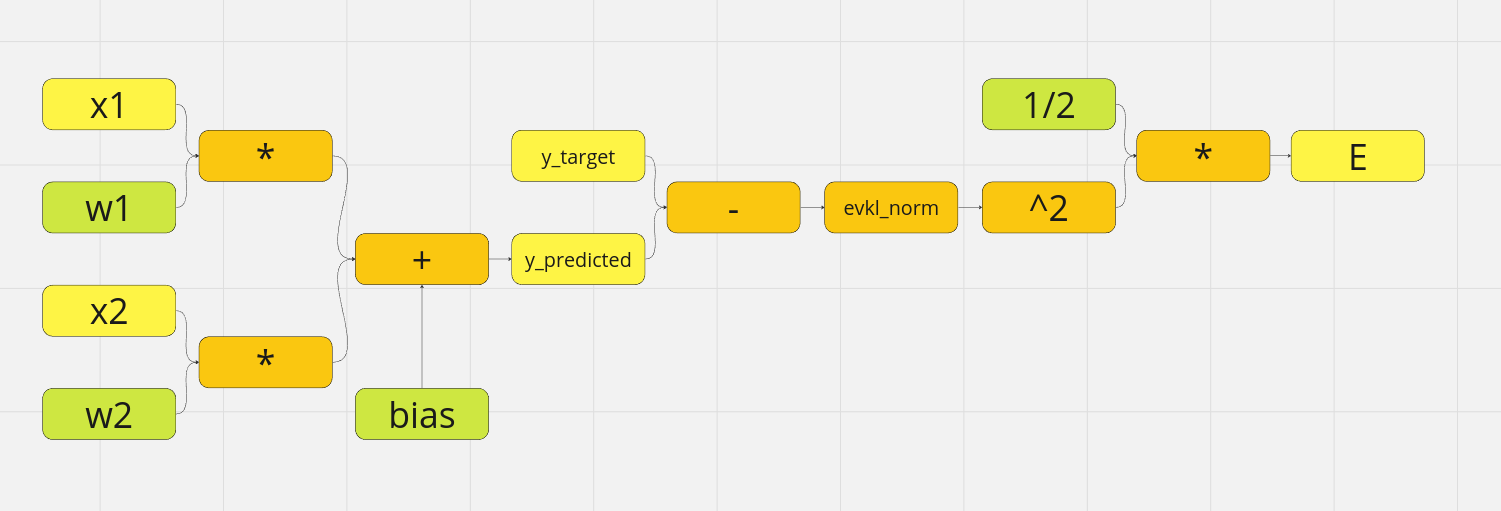

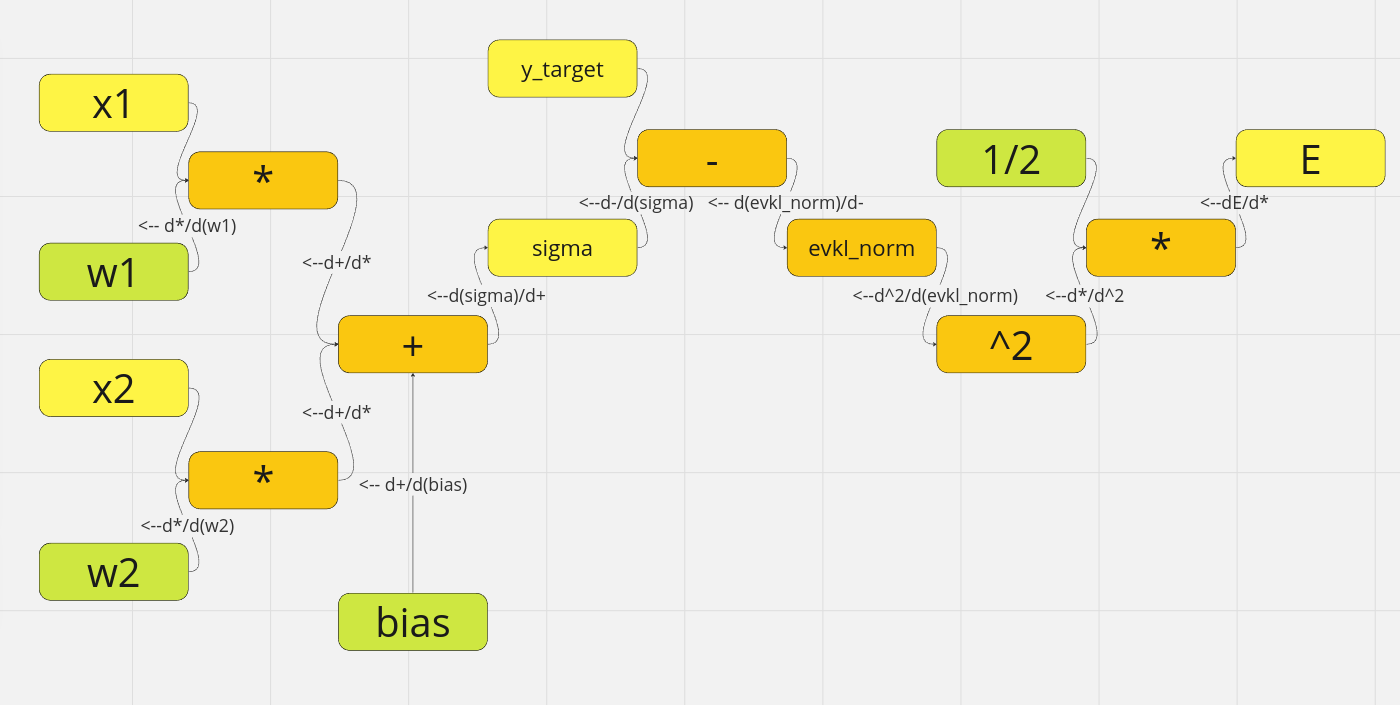

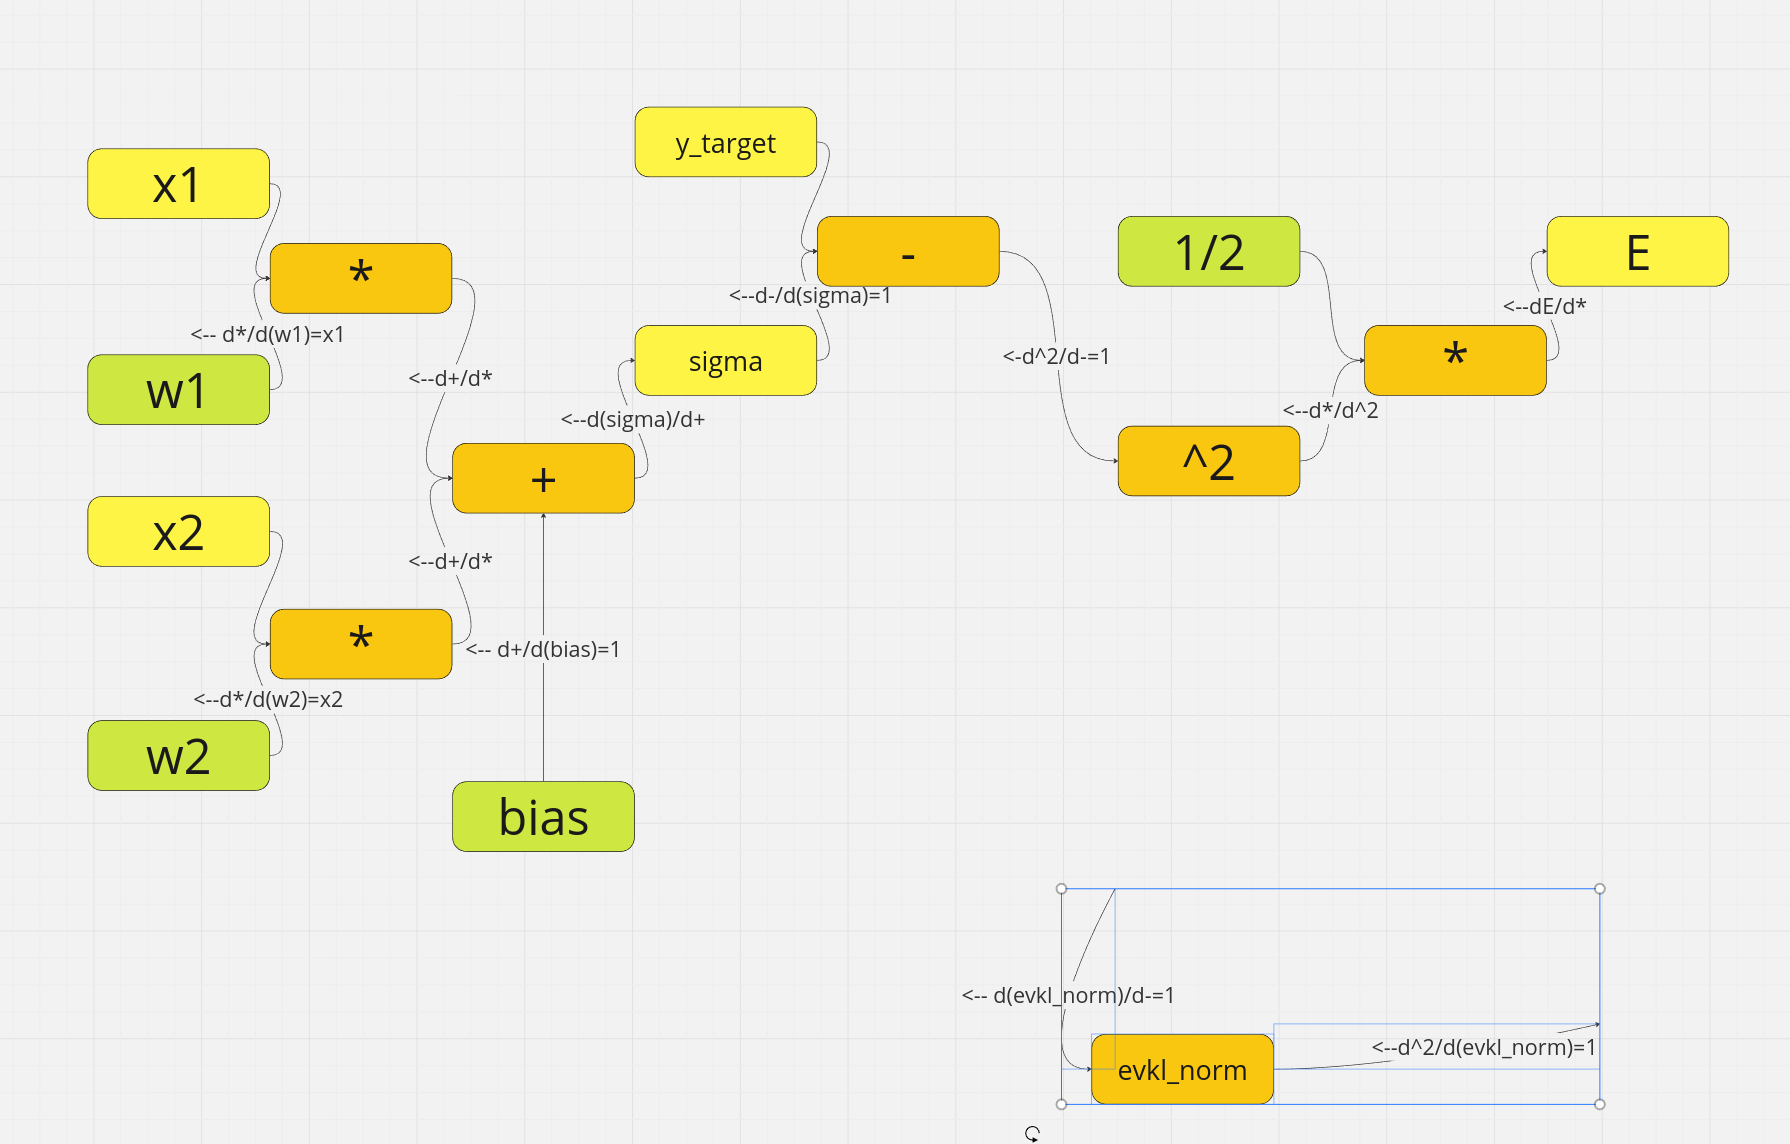